# Week 7 - Midterm

Source of data: https://www.kaggle.com/datasets/antimoni/metabolic-syndrome

In [1]:
# !unzip archive.zip

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [20]:
data = pd.read_csv('Metabolic Syndrome.csv')
data.head()

,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,62161,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,0
1,62164,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,0
2,62169,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,0
3,62172,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,0
4,62177,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,0


In [4]:
print(f'{data.shape=}')
data.info()

data.shape=(2401, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   seqn               2401 non-null   int64  
 1   Age                2401 non-null   int64  
 2   Sex                2401 non-null   object 
 3   Marital            2193 non-null   object 
 4   Income             2284 non-null   float64
 5   Race               2401 non-null   object 
 6   WaistCirc          2316 non-null   float64
 7   BMI                2375 non-null   float64
 8   Albuminuria        2401 non-null   int64  
 9   UrAlbCr            2401 non-null   float64
 10  UricAcid           2401 non-null   float64
 11  BloodGlucose       2401 non-null   int64  
 12  HDL                2401 non-null   int64  
 13  Triglycerides      2401 non-null   int64  
 14  MetabolicSyndrome  2401 non-null   int64  
dtypes: float64(5), int64(7), object(3)
memory usage: 2

In [21]:
data_clean = data.copy()
data_clean.drop(columns=['seqn'],inplace=True)
data_clean.loc[data.BMI.isnull(), 'BMI'] = np.round(data.BMI.mean(), 1)
data_clean.loc[data.WaistCirc.isnull(), 'WaistCirc'] = np.round(data.WaistCirc.mean(), 1)
MeanIncome = data.Income.mean()
data_clean.loc[data.Income.isnull(), 'Income'] = np.round(MeanIncome,2)
data_clean['AboveAverageIncome'] = data_clean.Income.apply(lambda x: x > MeanIncome)
data_clean = data_clean.loc[~data.Marital.isnull()]
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2193 entries, 0 to 2400
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 2193 non-null   int64  
 1   Sex                 2193 non-null   object 
 2   Marital             2193 non-null   object 
 3   Income              2193 non-null   float64
 4   Race                2193 non-null   object 
 5   WaistCirc           2193 non-null   float64
 6   BMI                 2193 non-null   float64
 7   Albuminuria         2193 non-null   int64  
 8   UrAlbCr             2193 non-null   float64
 9   UricAcid            2193 non-null   float64
 10  BloodGlucose        2193 non-null   int64  
 11  HDL                 2193 non-null   int64  
 12  Triglycerides       2193 non-null   int64  
 13  MetabolicSyndrome   2193 non-null   int64  
 14  AboveAverageIncome  2193 non-null   bool   
dtypes: bool(1), float64(5), int64(6), object(3)
memory usage: 25

In [6]:
data_clean.head()

,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome,AboveAverageIncome
0,22,Male,Single,8200.00,White,81.0,23.3,0,3.88,4.9,92,41,84,0,True
1,44,Female,Married,4500.00,White,80.1,23.2,0,8.55,4.5,82,28,56,0,True
2,21,Male,Single,800.00,Asian,69.6,20.1,0,5.07,5.4,107,43,78,0,False
3,43,Female,Single,2000.00,Black,120.4,33.3,0,5.22,5.0,104,73,141,0,False
4,51,Male,Married,4005.25,Asian,81.1,20.1,0,8.13,5.0,95,43,126,0,False


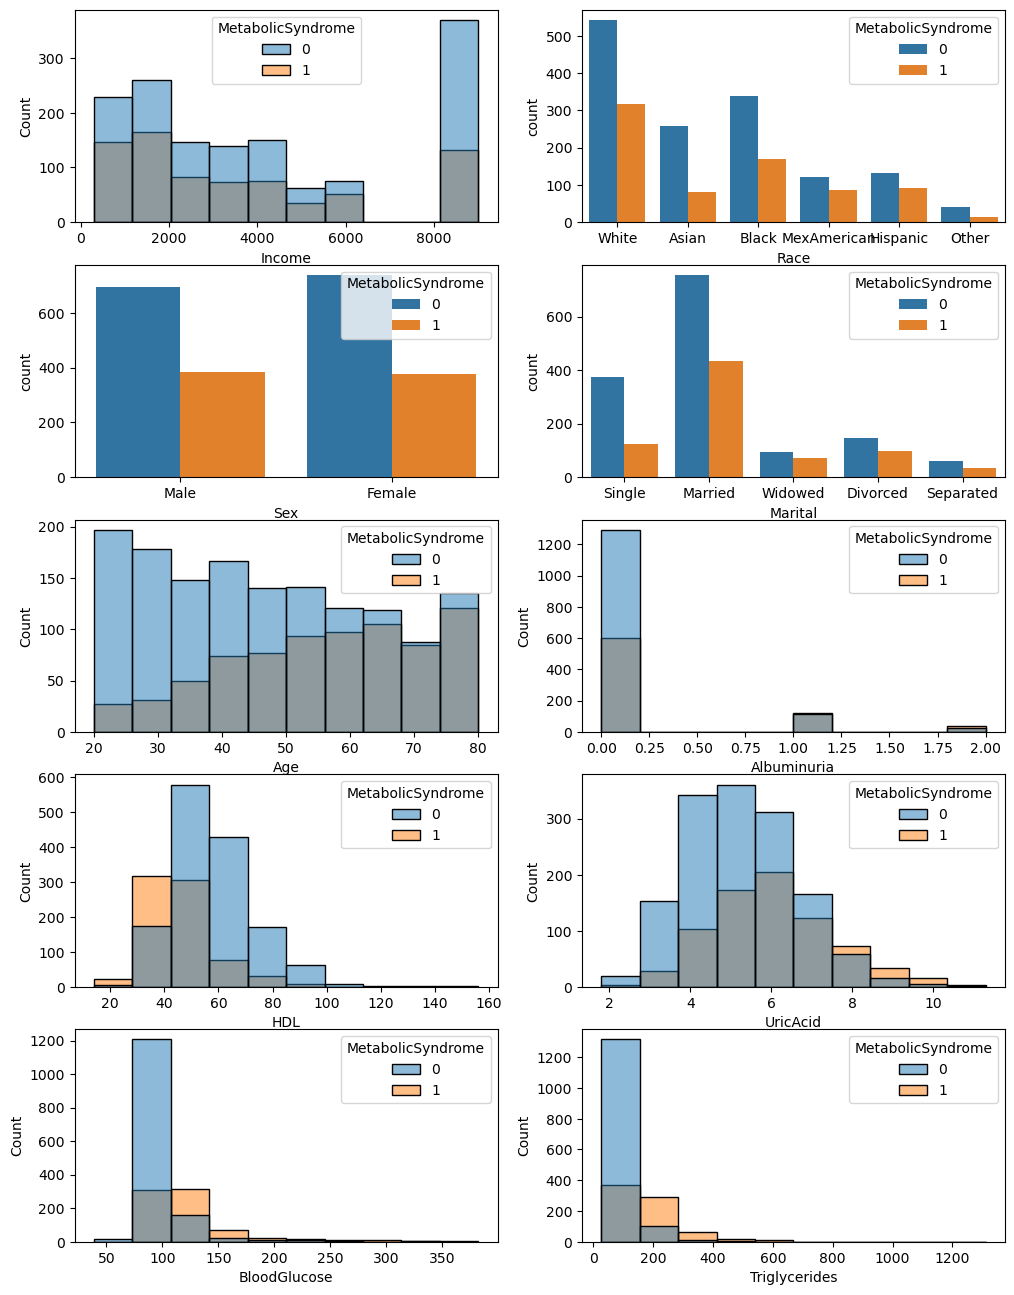

In [7]:
fig, axes = plt.subplots(5,2)
fig.set_size_inches(12, 16)
sns.histplot(data=data_clean, x='Income',hue='MetabolicSyndrome', bins=10, ax=axes[0][0])
sns.countplot(data=data_clean, x='Race', hue='MetabolicSyndrome', ax=axes[0][1])
sns.countplot(data=data_clean, x='Sex', hue='MetabolicSyndrome', ax=axes[1][0])
sns.countplot(data=data_clean, x='Marital', hue='MetabolicSyndrome', ax=axes[1][1])
sns.histplot(data=data_clean, x='Age',hue='MetabolicSyndrome', bins=10, ax=axes[2][0])
sns.histplot(data=data_clean, x='Albuminuria',hue='MetabolicSyndrome', bins=10, ax=axes[2][1])
sns.histplot(data=data_clean, x='HDL',hue='MetabolicSyndrome', bins=10, ax=axes[3][0])
sns.histplot(data=data_clean, x='UricAcid',hue='MetabolicSyndrome', bins=10, ax=axes[3][1])
sns.histplot(data=data_clean, x='BloodGlucose',hue='MetabolicSyndrome', bins=10, ax=axes[4][0])
sns.histplot(data=data_clean, x='Triglycerides',hue='MetabolicSyndrome', bins=10, ax=axes[4][1])
plt.show()

Most people of various demographics tend to show absence of Metabolic Syndrome.

<AxesSubplot:xlabel='MetabolicSyndrome', ylabel='count'>

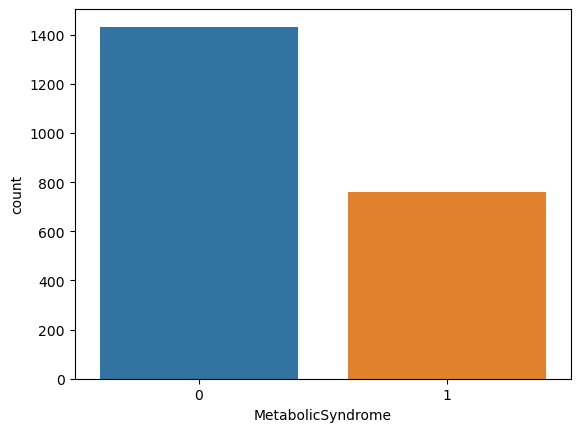

In [8]:
sns.countplot(data=data_clean, x='MetabolicSyndrome')

In [22]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(data_clean, test_size=.20, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=.25, random_state=42)

y_train = df_train.pop('MetabolicSyndrome')
y_val = df_val.pop('MetabolicSyndrome')
y_test = df_test.pop('MetabolicSyndrome')

In [10]:
from sklearn.metrics import auc, roc_auc_score
from sklearn.metrics import mutual_info_score

numerical_cols = df_train.select_dtypes(exclude='object')
categorical_cols = df_train.select_dtypes(include='object')
y_col = 'MetabolicSyndrome'

roc_auc_scores = {}
for col in numerical_cols:
    roc_auc = roc_auc_score(y_train, df_train[col])
    if roc_auc < 0.5:
        roc_auc = roc_auc_score(y_train, df_train[col])
    roc_auc_scores[col] = roc_auc
roc_auc_score = sorted(list(roc_auc_scores.items()), key=lambda x: -x[1])
for col,score in roc_auc_score:
    print(f'ROC AUC score of {col} and {y_col} is {round(score,4)}')
    
print()

for col in categorical_cols:
    mis = mutual_info_score(df_train[col], y_train)
    print(f'MIS of {col} and {y_col} is {round(mis,4)}')

ROC AUC score of BloodGlucose and MetabolicSyndrome is 0.8255
ROC AUC score of WaistCirc and MetabolicSyndrome is 0.8001
ROC AUC score of Triglycerides and MetabolicSyndrome is 0.7953
ROC AUC score of BMI and MetabolicSyndrome is 0.7664
ROC AUC score of Age and MetabolicSyndrome is 0.6608
ROC AUC score of UrAlbCr and MetabolicSyndrome is 0.646
ROC AUC score of UricAcid and MetabolicSyndrome is 0.6433
ROC AUC score of Albuminuria and MetabolicSyndrome is 0.5732
ROC AUC score of AboveAverageIncome and MetabolicSyndrome is 0.4694
ROC AUC score of Income and MetabolicSyndrome is 0.4473
ROC AUC score of HDL and MetabolicSyndrome is 0.2475

MIS of Sex and MetabolicSyndrome is 0.0002
MIS of Marital and MetabolicSyndrome is 0.0072
MIS of Race and MetabolicSyndrome is 0.0093


In [11]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=True)

X_train = dv.fit_transform(df_train.to_dict(orient='records'))
X_val = dv.transform(df_val.to_dict(orient='records'))

In [12]:
from sklearn.tree import DecisionTreeRegressor, export_text

model = DecisionTreeRegressor(max_depth=1)
model.fit(X_train, y_train)

print(export_text(model, feature_names=list(dv.get_feature_names_out())))

|--- BloodGlucose <= 99.50
|   |--- value: [0.10]
|--- BloodGlucose >  99.50
|   |--- value: [0.60]



In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

estimators = range(50, 201, 10)
depths = range(3, 15, 1)
grid = {'n_estimators': estimators, 'max_depth': depths}
rfc = RandomForestClassifier(random_state=42, n_jobs=-1)
gcv = GridSearchCV(rfc, grid)

gcv.fit(X_train, y_train)
gcv.best_estimator_

RandomForestClassifier(max_depth=11, n_estimators=60, n_jobs=-1,
                       random_state=42)

In [14]:
rfc_best = gcv.best_estimator_
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_val) >= 0.5
round(accuracy_score(y_val, y_pred), 3)

0.863

In [15]:
rfc_importance = pd.DataFrame({'features': dv.feature_names_, 'importance':rfc.feature_importances_})
rfc_importance.sort_values(by='importance', ascending=False)

,features,importance
4,BloodGlucose,0.191346
20,Triglycerides,0.174147
23,WaistCirc,0.132831
5,HDL,0.105267
3,BMI,0.096096
21,UrAlbCr,0.064653
1,Age,0.056063
22,UricAcid,0.053104
6,Income,0.030625
18,Sex=Female,0.013148


We can consider removing `race`, `marital`, `AboveAverageIncome` and `Albuminuria` for training purpose.

In [29]:
##################################
### TO BE RUN AFTER DEPLOYMENT ###
##################################
import requests 

url = "http://10.0.0.7:9696/predict"
print("(Row,Col) of test data is ", df_test.shape, '\n')
sample_test = df_test.iloc[100][['Age', 'Sex', 'Income', 'WaistCirc', 'BMI',
            'UrAlbCr', 'UricAcid', 'BloodGlucose', 'HDL', 'Triglycerides']].to_dict()

response = requests.post(url, json=sample_test).json()

print(sample_test, '\n\n', response)

(Row,Col) of test data is  (439, 14) 



ConnectionError: HTTPConnectionPool(host='10.0.0.7', port=9696): Max retries exceeded with url: /predict (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001B591CCC550>: Failed to establish a new connection: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond'))